# Discriminative Task-guided Compressed Sensing Basis Design

## 7341_C2 - infant formula of two brands; 7344_C2 - Raman spectroscopic profiling dataset of 5-year and 20-year Gujing Tribute vintage liquors    
7341稀疏性优于7344

## CS重建后PCA，要保持分类结构，所需要的k与four-to-one理论值接近，不能采用更小的k （试验失败）

## TODO: 使用Supervised Learning构造basis

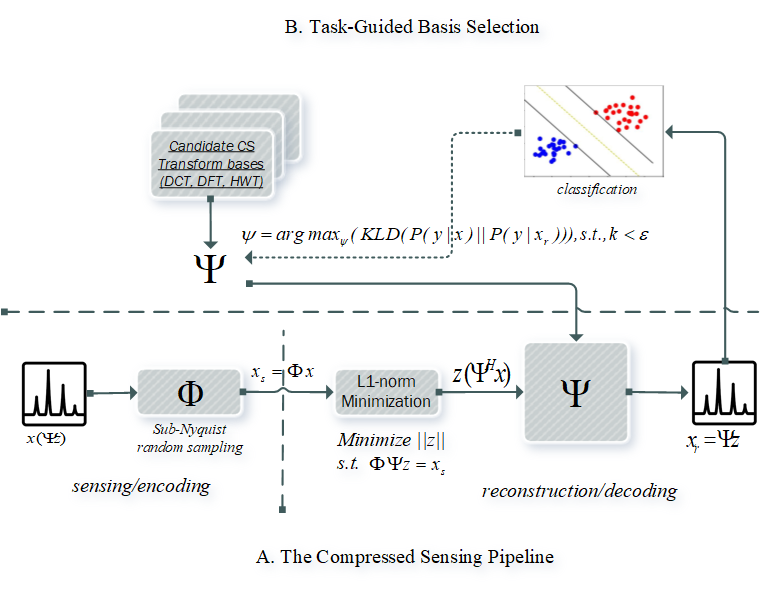

# Load Data

load dataset from 7341_C2.csv


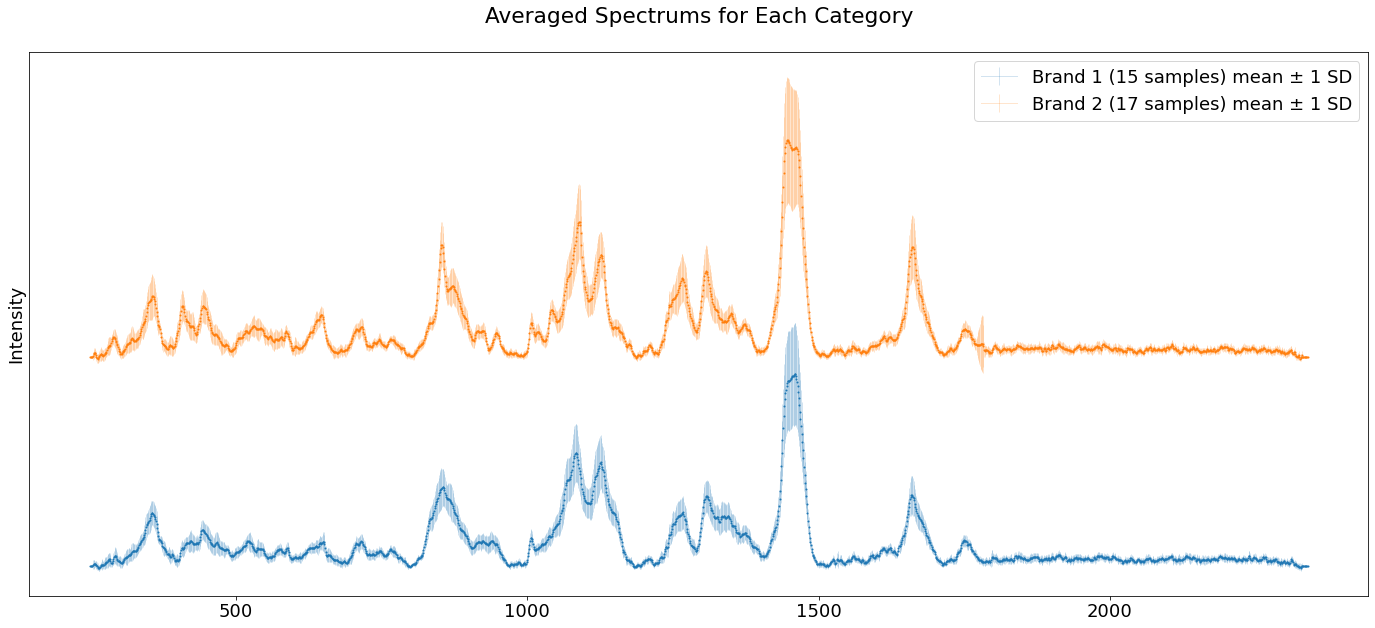

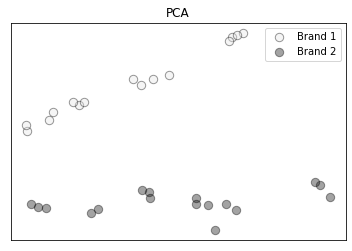

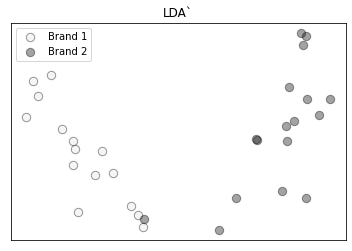

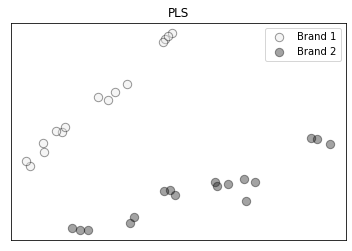

7341_C2.txt - The data set in CSV (comma separated value) format.

* Data Source: Stage 4 (4-C7 years) formula milk powder
* Procedures: Take a proper amount of milk powder into a separate small hole in the 96-well plate. Then, the sample is directly irradiated by a laser Raman spectrometer. The laser power is 250mW, 350mW, 450mW, the integration time is 50s, the spectrum range is 250~2 339cm-1, and the spectral resolution is 1cm-1.

The first column is 'label'. Value is either 1 (1st Brand) or 2 (2nd Brand). The rest 2090 columns are the Raman wavenumbers. Each row is a sample. This data set is typically used for brand classification. 
--------------------
If you use this data set, please add the reference: 
[1] Adaptive compressed sensing of Raman spectroscopic profiling data for discriminative tasks [J]. Talanta, 2020, doi: 10.1016/j.talanta.2019.120681


In [6]:
from qsi import io

X, y, X_names,_,labels = io.load_dataset('s4_formula_c2', shift = 2000)

The two classes have a wide dividing area. After CS, we want to keep this discriminative structure between the two classes. 

## Load PSIs (back from pickle)

Raman spetrum has a high dimension. Generation of $\Psi$ is time consuming. We can just reload the result from previously saved PKL file.

In [54]:
# Load PSIs back from pickle
import pickle

m, n = X.shape
file = open('PSIs_' + str(n) + '.pkl','rb')
PSIs = pickle.load(file)
file.close()

## Do CLA

In [44]:
from pyCLAMs import clams
ds = {}
ds['k = 1'] = clams.get_metrics(X,y) # Return a dictionary of all metrics

Check at k = 0.1 and 0.3, whether the reconstructed data Xr has lost the original between-class structure.



===== Ψ = DCT, k =0.3 ======

f=1.9389268591612687,p=0.1740209265018799
f=162.3789513287869,p=1.226184520974351e-13
['PC1', 'PC2']
['Intercept', 'y']
                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.1654 2.0000 29.0000 73.1824 0.0000
          Pillai's trace 0.8346 2.0000 29.0000 73.1824 0.0000
  Hotelling-Lawley trace 5.0471 2.0000 29.0000 73.1824 0.0000
     Roy's greatest root 5.0471 2.0000 29.0000 73.1824 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
           y            Value  Num DF  Den DF F Value  Pr > F
------------------------------------------------------------

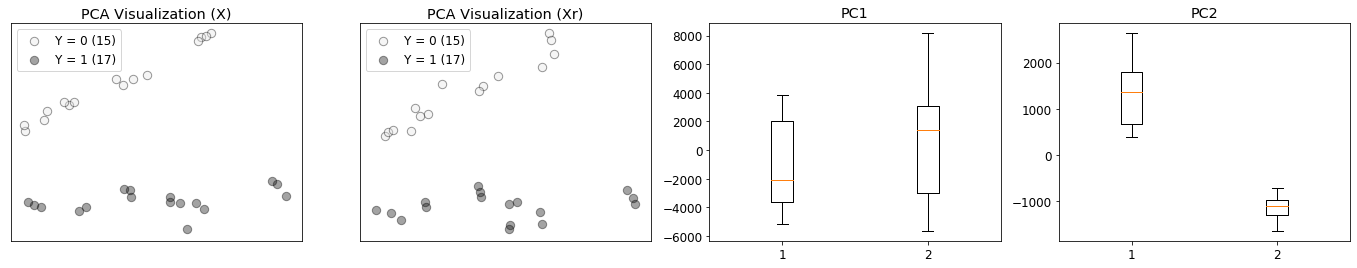


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  1.31
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  0.332

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.093


===== Ψ = DCT, k =0.2 ======

f=1.4183609823071106,p=0.24301140608909863
f=93.10579617324724,p=1.0441870030332021e-10
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3180 2.0000 29.0000 31.0941 0.0000
         Pillai's trace 0.6820 2.0000 29.0000 31.0941 0.0000
 Hotelling-Lawley trace 2.1444 2.0000 29.0000 31.0941 0.0000
    Roy's greatest root 2.1444 

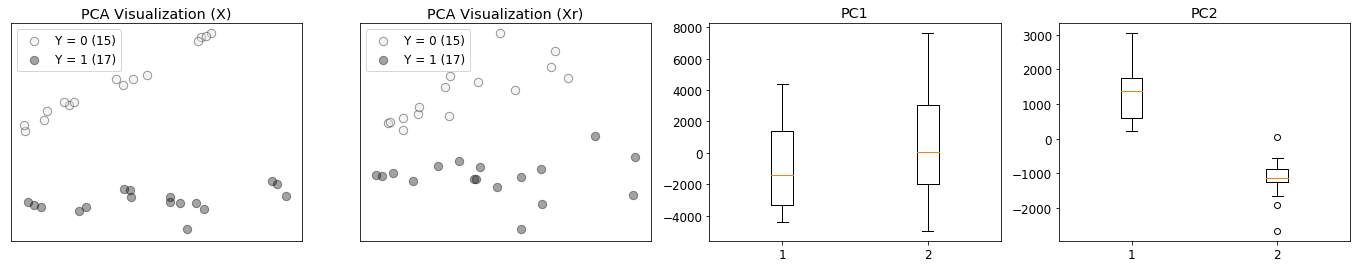


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  1.471
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  0.551

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.247


===== Ψ = DCT, k =0.1 ======

f=0.07331864187811458,p=0.788419067872469
f=0.761628341748049,p=0.38975124521683935
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9854 2.0000 29.0000  0.2154 0.8075
         Pillai's trace 0.0146 2.0000 29.0000  0.2154 0.8075
 Hotelling-Lawley trace 0.0149 2.0000 29.0000  0.2154 0.8075
    Roy's greatest root 0.0149 2.0

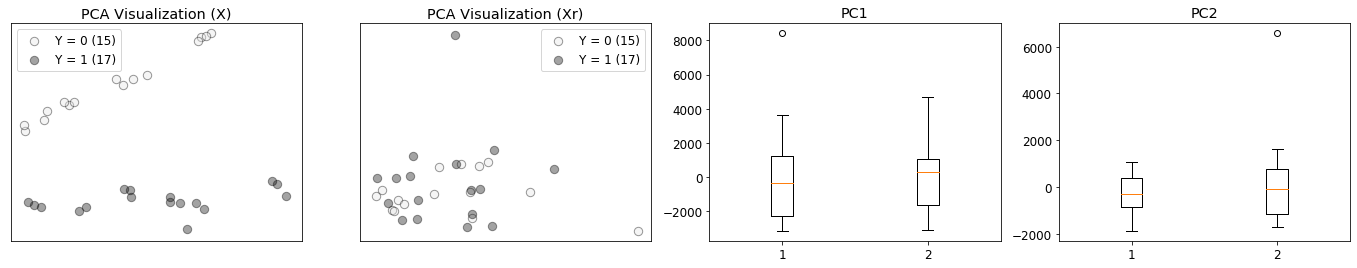


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  4.429
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  3.522

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.291


===== Ψ = DCT, k =0.05 ======

f=1.1596061263002124,p=0.2901308947891196
f=0.22940191379283092,p=0.6354403943828227
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9757 2.0000 29.0000  0.3613 0.6999
         Pillai's trace 0.0243 2.0000 29.0000  0.3613 0.6999
 Hotelling-Lawley trace 0.0249 2.0000 29.0000  0.3613 0.6999
    Roy's greatest root 0.0249 2

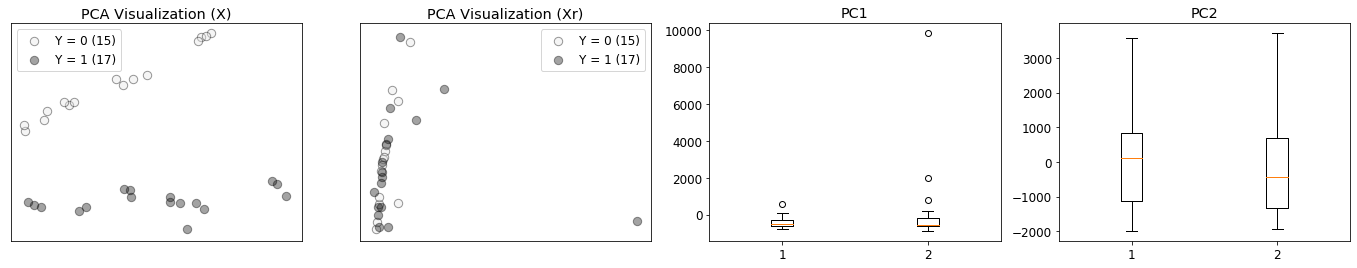


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  137.287
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  2.38

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  1.747


===== Ψ = DCT, k =0.02 ======

f=0.8745254469354559,p=0.35717252433000524
f=1.3935784874663673,p=0.2470772423003533
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9600 2.0000 29.0000  0.6041 0.5533
         Pillai's trace 0.0400 2.0000 29.0000  0.6041 0.5533
 Hotelling-Lawley trace 0.0417 2.0000 29.0000  0.6041 0.5533
    Roy's greatest root 0.0417 

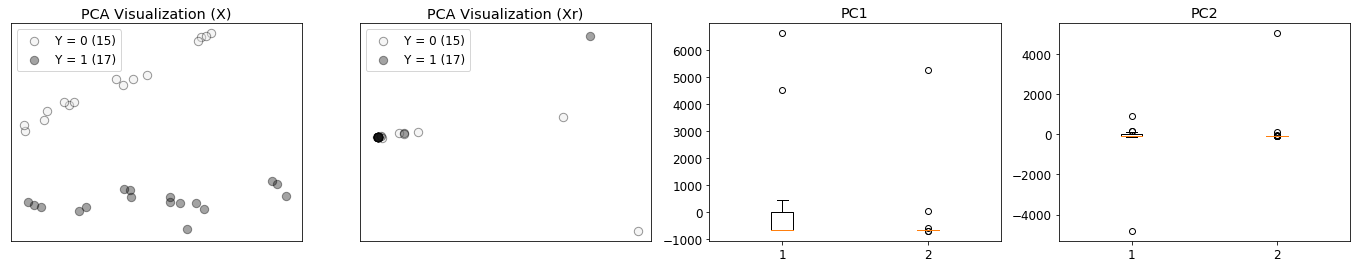


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  6.484
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  986.667

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.161


===== Ψ = DCT, k =0.01 ======

f=0.7897913583268239,p=0.38123385695394263
f=1.2330430607499214,p=0.27563732860679185
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9643 2.0000 29.0000  0.5367 0.5904
         Pillai's trace 0.0357 2.0000 29.0000  0.5367 0.5904
 Hotelling-Lawley trace 0.0370 2.0000 29.0000  0.5367 0.5904
    Roy's greatest root 0.037

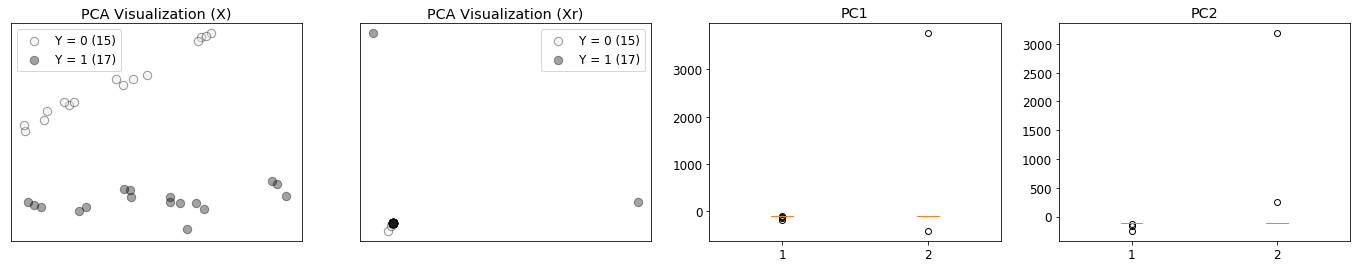


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  3382065.057
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  14.278

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.053


===== Ψ = DFT, k =0.3 ======

f=2.3586567102031286,p=0.13507009655865854
f=84.91157732752433,p=2.965814203109848e-10
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3038 2.0000 29.0000 33.2319 0.0000
         Pillai's trace 0.6962 2.0000 29.0000 33.2319 0.0000
 Hotelling-Lawley trace 2.2919 2.0000 29.0000 33.2319 0.0000
    Roy's greatest root 

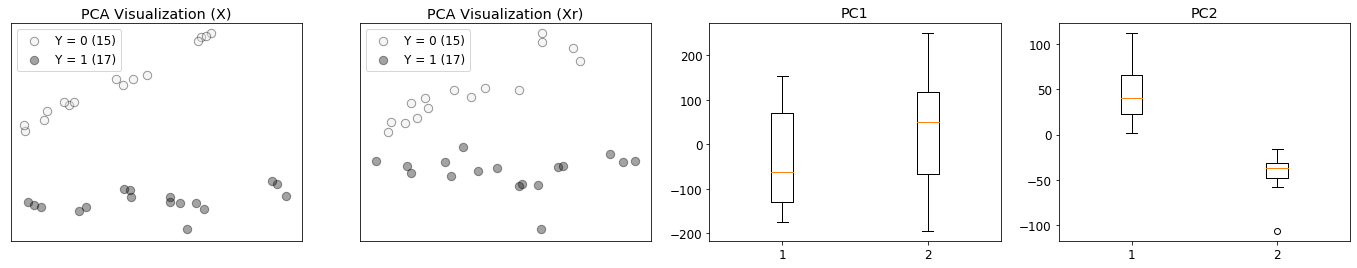


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  9574.101
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  2982.887

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.103


===== Ψ = DFT, k =0.2 ======

f=1.7314463788790495,p=0.19819336976971155
f=15.494351104114353,p=0.0004547831890547118
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.7424 2.0000 29.0000  5.0323 0.0133
         Pillai's trace 0.2576 2.0000 29.0000  5.0323 0.0133
 Hotelling-Lawley trace 0.3471 2.0000 29.0000  5.0323 0.0133
    Roy's greatest root 

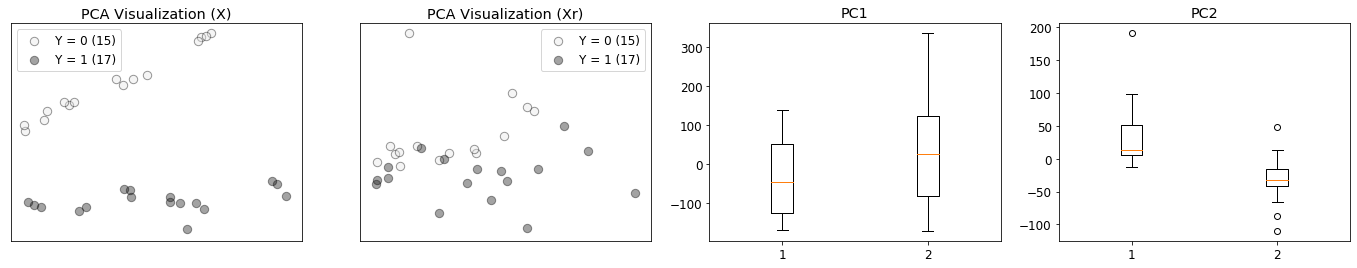


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  1377.215
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  1230.364

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.065


===== Ψ = DFT, k =0.1 ======

f=0.3869335395961099,p=0.5386148901293957
f=0.7749690725350756,p=0.3856822355978212
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9795 2.0000 29.0000  0.3036 0.7405
         Pillai's trace 0.0205 2.0000 29.0000  0.3036 0.7405
 Hotelling-Lawley trace 0.0209 2.0000 29.0000  0.3036 0.7405
    Roy's greatest root 0.02

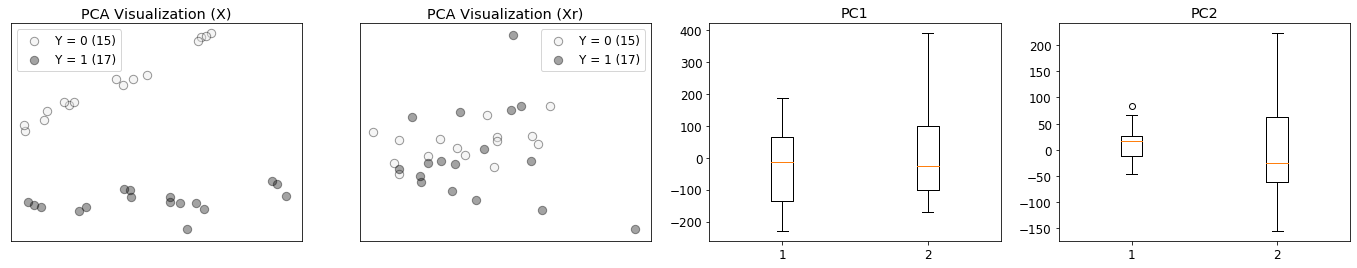


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  2026.884
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  731.964

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.09


===== Ψ = DFT, k =0.05 ======

f=3.445054427514251,p=0.07328817192890984
f=0.5006922215088742,p=0.4846573581848248
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9328 2.0000 29.0000  1.0447 0.3647
         Pillai's trace 0.0672 2.0000 29.0000  1.0447 0.3647
 Hotelling-Lawley trace 0.0720 2.0000 29.0000  1.0447 0.3647
    Roy's greatest root 0.072

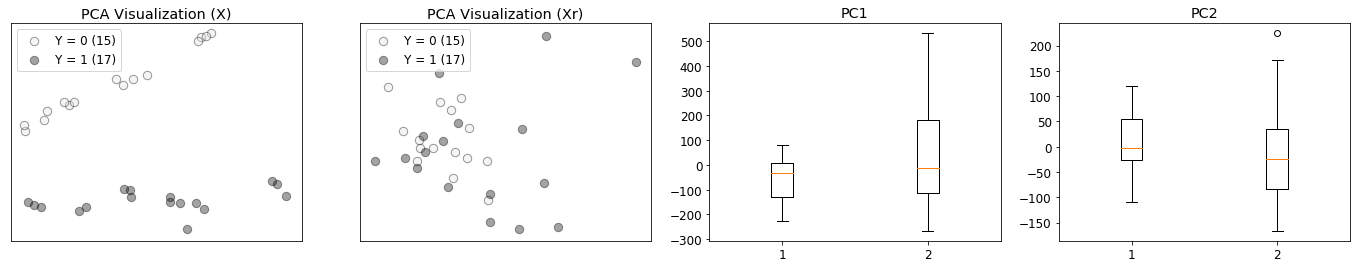


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  2020.843
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  377.956

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.1


===== Ψ = DFT, k =0.02 ======

f=4.44739325401071,p=0.04341058043290179
f=1.4628147504974374,p=0.23592805144853204
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8983 2.0000 29.0000  1.6408 0.2113
         Pillai's trace 0.1017 2.0000 29.0000  1.6408 0.2113
 Hotelling-Lawley trace 0.1132 2.0000 29.0000  1.6408 0.2113
    Roy's greatest root 0.1132

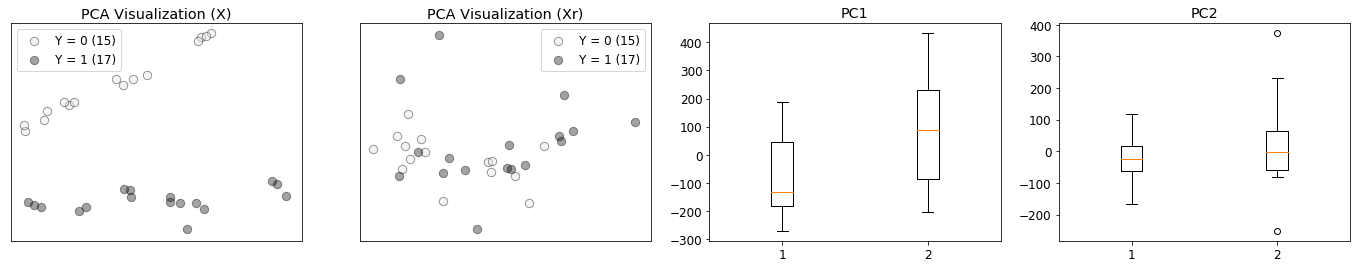


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  984.38
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  428.776

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.026


===== Ψ = DFT, k =0.01 ======

f=3.4770646879010427,p=0.07203503527746404
f=0.028514962496707878,p=0.8670372400267685
['PC1', 'PC2']
['Intercept', 'y']
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9414 2.0000 29.0000  0.9019 0.4169
         Pillai's trace 0.0586 2.0000 29.0000  0.9019 0.4169
 Hotelling-Lawley trace 0.0622 2.0000 29.0000  0.9019 0.4169
    Roy's greatest root 0.0

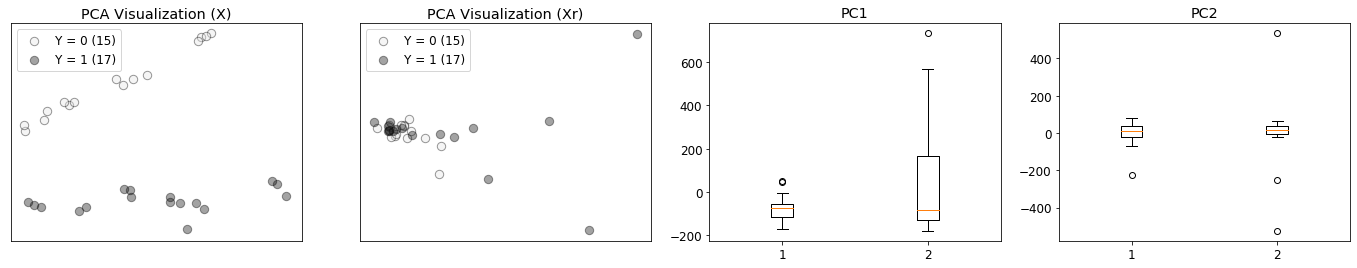


 ------ Class-wise Multivarate KLD on 2 PCA components -----
Multivarate KLD between the orignal and reconstructed signals ( y = 0):  5072.229
Multivarate KLD between the orignal and reconstructed signals ( y = 1):  189.148

 ------ Class-wise Multivarate KLD on LDA component -----
KLD between the orignal and reconstructed signals ( y = 1):  0.237


In [45]:
from cs1 import cs

for t in ['DCT', 'DFT']:
    for k in [0.3, 0.2, 0.1, 0.05, 0.02, 0.01]:
        Z, Xr = cs.Dataset_Sensing_n_Recovery (X, y = y, k = k, t = t, solver = 'LASSO', display = 'none')
        ds[t + '<br/>k = ' + str(k)] = clams.get_metrics(Xr, y) # CLA metrics after reconstruction

When k = 0.1, the original discriminative structures in the data is lost (some samples from two classes begin to overlap), and the MANOVA under some $\lambda$ test cannot reject the null-hypothesis $H_0$.   
k = 0.2 and 0.3 well preserves the discriminative structure. This result also supports the four-to-one rule.  

KLD测量了PCA / LDA的首要主成分在不同 y 类别下的分布变异情况。DCT的PCA-KLD基本呈现随k下降而升高的规律。其余情况指示性不好。

In [9]:
# test Mean_KLD function

clams.Mean_KLD ([[1/2, 1/2], [1/2, 1/2], [1/2, 1/2], [1/2, 1/2]], 
                [[1, 0],[999/1000, 1/1000],[9/10, 1/10], [1/2, 1/2]])

(inf, [inf, 2.761230709097915, 0.5108256237659907, 0.0])

In [46]:
import pickle 

filehandler = open('clams.pkl',"wb")
pickle.dump(ds, filehandler)
filehandler.close()

In [52]:
from IPython.core.display import display, HTML

s = '<table>'

bHeader = True

for key in ds['k = 1'][1]:
    
    if bHeader:
        s += '<tr><td></td>'
        for key2 in ds: 
            s+= '<td>' + key2 + '</td>'
        s += '</tr>'
            
    s+= '<tr>' 

    s+= '<td>' + key + '</td>'
    
    for key2 in ds:         
        bHeader = False
        s+= '<td>' + str(round(ds[key2][1][key], 3)) + '</td>'

    s+= '</tr>'

s += '</table>'
display(HTML(s))

,k = 1,DCTk= 0.3,DCTk= 0.2,DCTk= 0.1,DCTk= 0.05,DCTk= 0.02,DCTk= 0.01,DFTk= 0.3,DFTk= 0.2,DFTk= 0.1,DFTk= 0.05,DFTk= 0.02,DFTk= 0.01
classification.ACC,1.0,1.0,1.0,1.0,0.969,0.75,0.625,1.0,1.0,1.0,1.0,1.0,0.938
classification.Kappa,1.0,1.0,1.0,1.0,0.938,0.482,0.21,1.0,1.0,1.0,1.0,1.0,0.875
classification.F1_Score,1.0,1.0,1.0,1.0,0.97,0.81,0.739,1.0,1.0,1.0,1.0,1.0,0.941
classification.Jaccard,1.0,1.0,1.0,1.0,0.941,0.68,0.586,1.0,1.0,1.0,1.0,1.0,0.889
classification.Precision,1.0,1.0,1.0,1.0,1.0,0.68,0.586,1.0,1.0,1.0,1.0,1.0,0.941
classification.Recall,1.0,1.0,1.0,1.0,0.941,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.941
classification.CrossEntropy,0.001,0.002,0.002,0.004,0.059,0.426,0.581,0.225,0.232,0.243,0.0,0.018,0.347
classification.Mean_KLD,0.001,0.002,0.002,0.004,0.059,0.426,0.581,0.225,0.232,0.243,0.0,0.018,0.347
classification.AP,1.0,1.0,1.0,1.0,0.997,0.774,0.635,1.0,1.0,1.0,1.0,1.0,0.989
classification.Brier,0.0,0.0,0.0,0.0,0.021,0.15,0.208,0.045,0.047,0.05,0.0,0.001,0.1


平均KL散度随着k增加而减小

# Multivariate KLD

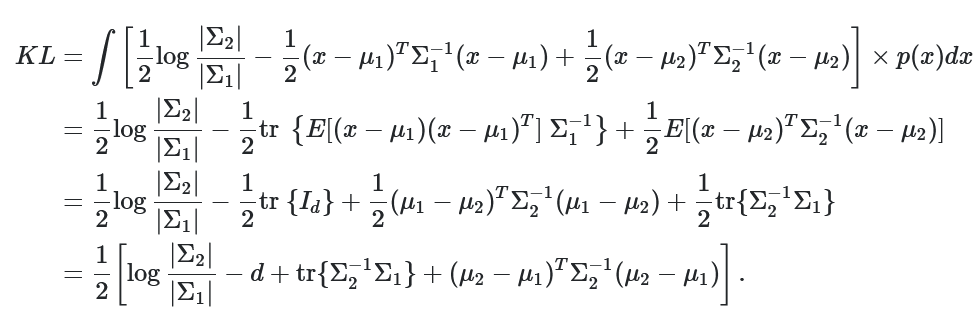

# Appendix: KLD

#### Entropy of a probability distribution
$$
H = - \sum_{i=1}^M{p(x_i)log p(x_i)}
$$
M is the number of samples

#### Kullback_Leibler Divergence / relative entropy
$$
KLD(p||q) = \sum_{i}{p(x_i)(log p(x_i) - log q(x_i))} = E(log p(x_i) - log q(x_i)) = \sum_{i}{p(x_i)log {p(x_i) \over q(x_i)}} = - H(X) + (-\sum_{i=1}^M{p(x_i){log q(x_i)}})
$$
,i.e. - entropy + cross_entropy

q is the approximating distribution

**KL divergence** (or distance) is designed to measure the difference between probability distributions. This means basically that what you pass to the function should be two array-likes, the elements of each of which sum to 1.  

The Kullback-Leibler divergence is unbounded. Indeed, since there is no lower bound on the q(i)
's, there is no upper bound on the p(i)/q(i)'s. For instance, the Kullback-Leibler divergence between a Normal N(μ1,σ2) and a Normal N(μ2,σ2) is

$$ {1 \over {2\sigma^2}}{(\mu_1 - \mu_2)^2} $$


From the theory of information, KLD can be construed as measuring the expected number of extra bits required to code samples from P using a code optimized for Q rather than the code optimized for P."

# Appendix - rank-nullity theorem

rank(A) + nullity(A) = #columns(A), i.e., the nullity of A is the complement to its rank.

In [28]:
import numpy as np
from scipy.linalg import null_space
from numpy.linalg import matrix_rank

NX = null_space(X)
print(X.shape, NX.shape)

assert np.allclose(X.dot(NX), 0)
assert matrix_rank(X) + NX.shape[1] == X.shape[1] # verify rank-nullity theorem

(32, 2090) (2090, 2058)


# Appendix - matrix approximation lemma | Eckart–Young–Mirsky theorem

The truncated SVD: 
$ A_k = \sum_{i=1}^k s_i u_i v_i^T $

$ {||A - A_k||}^2_F = {|| \sum_{i=k+1}^{n} s_i u_i v_i^T ||}^2_F = \sum_{i=k+1}^{n} s_i^2 $

||𝐴−𝐴𝑘||𝐹^2


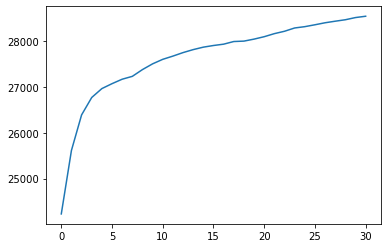

∑si^2


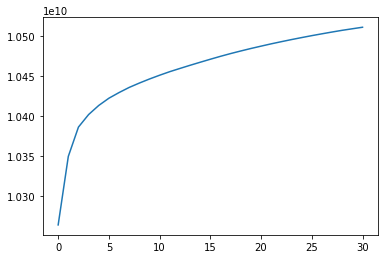

In [45]:
U,S,V = np.linalg.svd(X)

FROS = [] # Frobius norm
SIGMAS = []

for k in range(1,len(S)):    
    Xk = np.zeros(X.shape)
    SIGMA = 0
    for i in range(k):
        Xk = Xk + U[:,i] @ (V[:,i].T) * S[i]
        SIGMA = SIGMA + S[i]**2
    
    # Xk = Xm @ V[:,:k] @ V[:,:k].T
    FROS.append(np.linalg.norm(X - Xk, ord='fro'))
    SIGMAS.append(SIGMA)
    
print("||𝐴−𝐴𝑘||𝐹^2")
plt.plot(FROS)
plt.show()

print("∑si^2")
plt.plot(SIGMAS)
plt.show()